Lab based on: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About

# Step 1 : Reading and understanding Train and Test Data set


Loading packages and data:


In [64]:
# Accuracy scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import metrics


In [65]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

train_original = pd.read_csv("input/train_ctrUa4K.csv")
train = train_original
train.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Reading the name of columns in data set

In [66]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [67]:
test = pd.read_csv("input/test_lAUu6dG.csv")
test_original_id = test['Loan_ID']
test.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Reading the name of columns in data set:

In [68]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# What are the data types present in the data?

Los tipos de datos presentes en el conjunto de datos son:

| Característica | Tipo de dato | Descripción |
| --- | --- | --- |
| Loan_ID | String  | *Identificación única de la solicitud* |
| Gender | String (Categoríca) | *Género del solicitante* |
| Married | String (Categoríca) | *Estado civil del solicitante* |
| Dependents | String (Ordinal) | *Número de personas dependientes del solicitante* |
| Education | String (Categoríca) | *Nivel de educación del solicitante* |
| Self_Employed | String (Categoríca) | *Indica si el solicitante trabaja como independiente* |
| ApplicantIncome | Entero | *Ingreso mensual del solicitante* |
| CoapplicantIncome | Double | *Ingreso mensual del co-solicitante* |
| LoanAmount | Double | *Cantidad solicitada de préstamo* |
| Loan_Amount_Term | Double | *Plazo del préstamo en meses* |
| Credit_History | Double(Categoríca) | *Clasificación del historial crediticio del solicitante (1 y 0)* |  


Además, el conjunto de datos de entrenamiento tiene una columna adicional llamada `Loan_Status` que indica si la solicitud de préstamo fue aprobada o no.




# **Univariate Analysis**
It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable


### **Visualize features of the data set by graph and get the analysis**

#### *Descripción del dataset*

Tamaño de los conjuntos de datos de entrenamiento y prueba:


In [69]:
train.shape, test.shape

((614, 13), (367, 12))

Es posible observar que el conjunto de datos de entrenamiento tiene 614 observaciones y 13 características, mientras que el conjunto de datos de prueba tiene 367 observaciones y 12 características. La característica adicional en el conjunto de datos de entrenamiento es `Loan_Status`, que indica si la solicitud de préstamo fue aprobada o no.

Valores null en el conjunto de datos de entrenamiento y prueba:

**Conjunto de datos de entrenamiento**

In [70]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Es posible observar que las características `Gender`, `Married`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term` y `Credit_History` tienen valores nulos en el conjunto de datos de entrenamiento, los cuales deben ser tratados antes de realizar el análisis, es importante tener en cuenta que la característica `Credit_History` es la que tiene mayor cantidad de valores nulos y debe ser tratada con cuidado,ya que es una característica importante para predecir si la solicitud de préstamo será aprobada o no.

**Conjunto de datos de prueba**

In [71]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Es posible observar que las características `Gender`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term` y `Credit_History` tienen valores nulos en el conjunto de datos de prueba, los cuales deben ser tratados antes de realizar el análisis.

Descripción de las características numéricas en el conjunto de datos de entrenamiento:

In [72]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Descripción de las características numéricas en el conjunto de datos de test:

In [73]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


De lo anterior, se puede decir que:
- Las medias de las características en ambos conjuntos de datos son similares, lo que indica que los datos están distribuidos de manera similar en ambos conjuntos.
- Las desviaciones estándar de las características en ambos conjuntos de datos son similares, lo que indica que los datos están dispersos de manera similar en ambos conjuntos.

En general, los datos en ambos conjuntos de datos están distribuidos de manera similar, lo que es importante para el análisis y la construcción de modelos.

#### *Visualización grafica de las características numéricas*	

ApplicantIncome(ingreso mensual del solicitante):

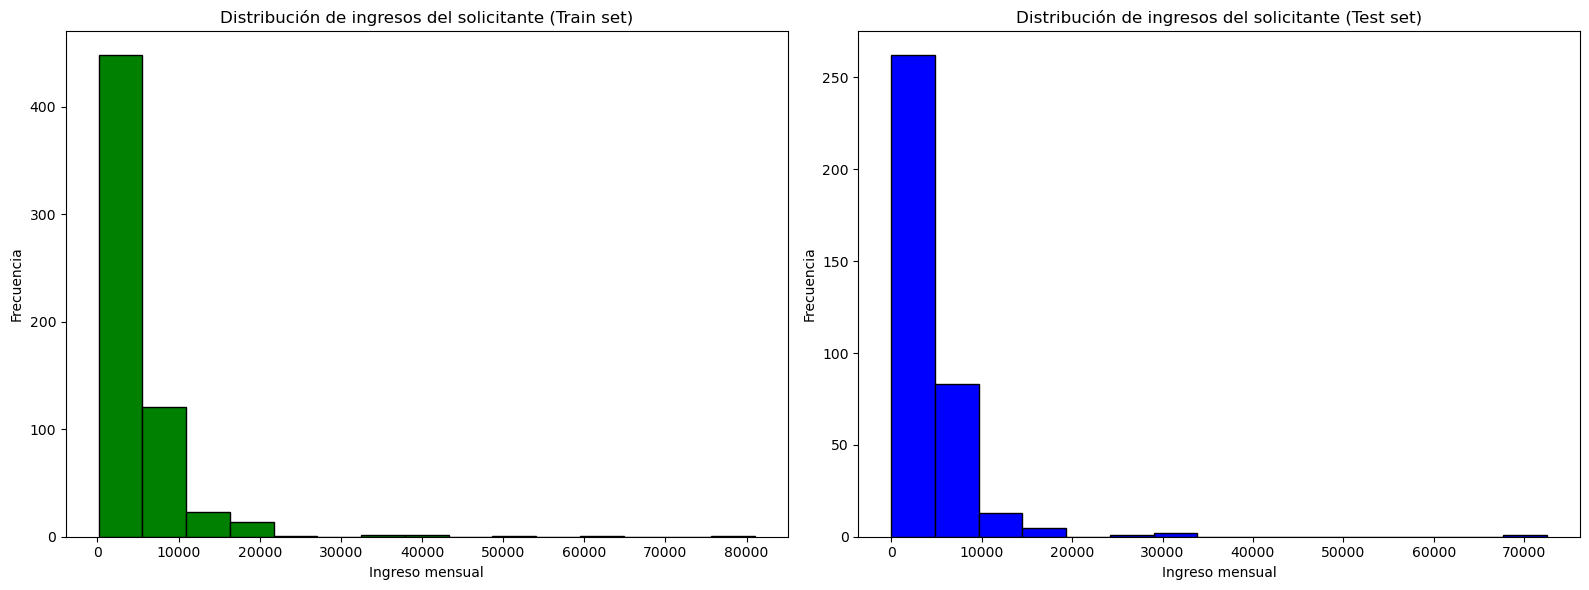

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(train['ApplicantIncome'], bins=15, color='green', edgecolor='black')
axs[0].set_title('Distribución de ingresos del solicitante (Train set)')
axs[0].set_xlabel('Ingreso mensual')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(test['ApplicantIncome'], bins=15, color='blue', edgecolor='black')
axs[1].set_title('Distribución de ingresos del solicitante (Test set)')
axs[1].set_xlabel('Ingreso mensual')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Es posible observar que la característica `ApplicantIncome` tiene una distribución sesgada a la izquierda, lo que indica que la mayoría de los solicitantes tienen ingresos bajos, pero hay algunos solicitantes con ingresos muy altos. Como anteriormente se mencionó, los datos están distribuidos de manera similar en ambos conjuntos de datos.

CoapplicantIncome(ingreso mensual del co-solicitante):

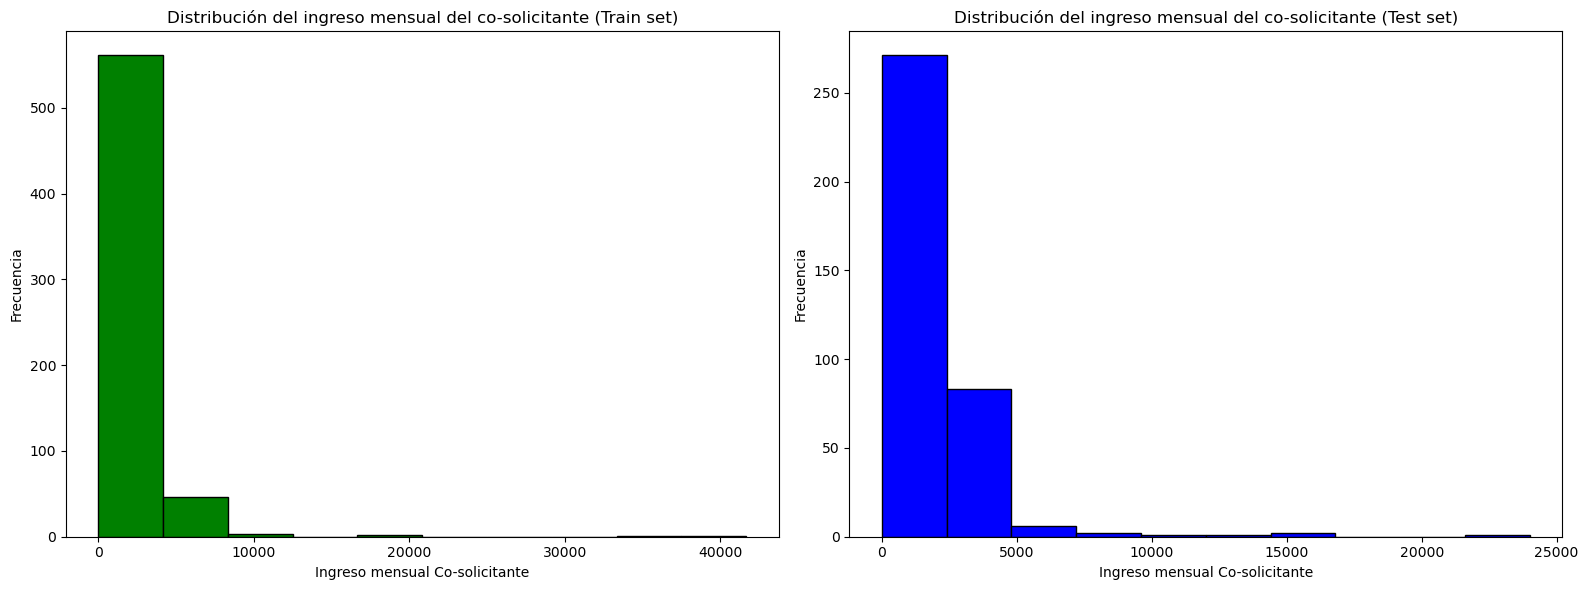

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(train['CoapplicantIncome'], bins=10, color='green', edgecolor='black')
axs[0].set_title('Distribución del ingreso mensual del co-solicitante (Train set)')
axs[0].set_xlabel('Ingreso mensual Co-solicitante')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(test['CoapplicantIncome'], bins=10, color='blue', edgecolor='black')
axs[1].set_title('Distribución del ingreso mensual del co-solicitante (Test set)')
axs[1].set_xlabel('Ingreso mensual Co-solicitante')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Es posible observar que la característica `CoapplicantIncome` tiene una distribución sesgada a la izquierda, lo que indica que la mayoría de los co-solicitantes tienen ingresos bajos, pero hay algunos co-solicitantes con ingresos muy altos. Como anteriormente se mencionó, los datos están distribuidos de manera similar en ambos conjuntos de datos.

LoanAmount(cantidad solicitada de préstamo):

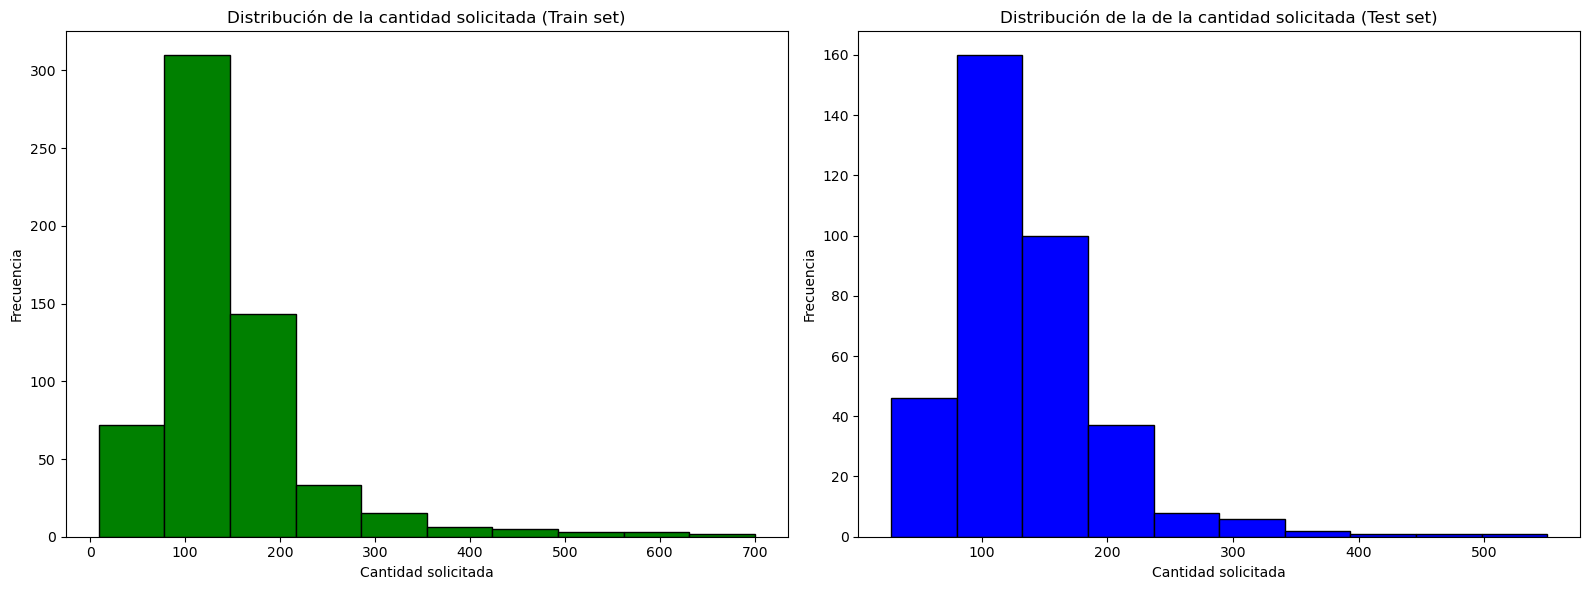

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(train['LoanAmount'], bins=10, color='green', edgecolor='black')
axs[0].set_title('Distribución de la cantidad solicitada (Train set)')
axs[0].set_xlabel('Cantidad solicitada')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(test['LoanAmount'], bins=10, color='blue', edgecolor='black')
axs[1].set_title('Distribución de la de la cantidad solicitada (Test set)')
axs[1].set_xlabel('Cantidad solicitada')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Es posible observar que la característica `LoanAmount` no esta tan sesgada hacia la izquierda, como las características anteriores, lo que indica que la mayoría de los solicitantes solicitan préstamos de cantidades similares, a pesar de que hay algunos solicitantes que solicitan préstamos de cantidades muy altas la transición de valores bajos a valores altos es más suave que la de las anteriores variables.

Loan_Amount_Term(plazo del préstamo en meses):

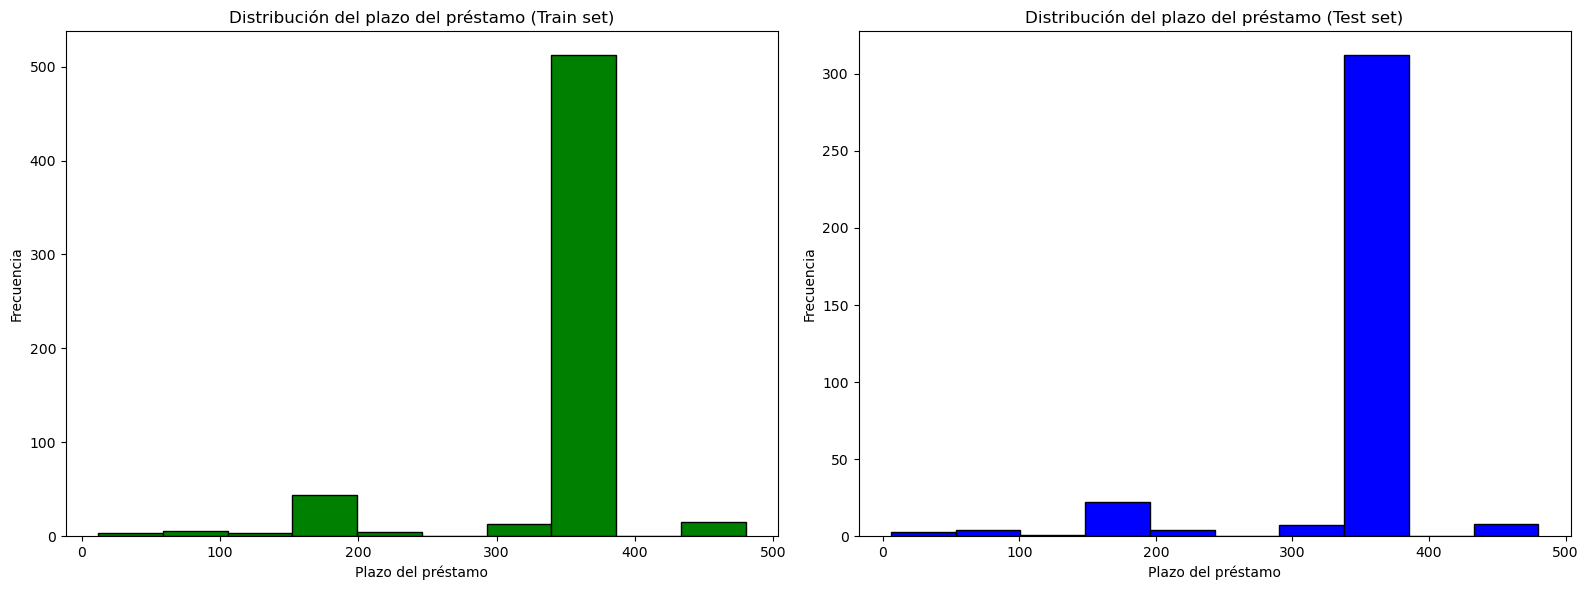

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(train['Loan_Amount_Term'], bins=10, color='green', edgecolor='black')
axs[0].set_title('Distribución del plazo del préstamo (Train set)')
axs[0].set_xlabel('Plazo del préstamo')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(test['Loan_Amount_Term'], bins=10, color='blue', edgecolor='black')
axs[1].set_title('Distribución del plazo del préstamo (Test set)')
axs[1].set_xlabel('Plazo del préstamo')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

En ambos conjuntos de datos podemos ver una distribución muy similar, donde la mayoría de los solicitantes solicitan préstamos con un plazo entre 300 y 400 meses, lo que indica que la mayoría de los solicitantes solicitan préstamos a largo plazo.

### **Study categorical features such as Gender, Married, Self_Employed and Credit_History**

Exploración de las características categóricas en el conjunto de datos:

**Género del solicitante:**

In [78]:
train['Gender'].value_counts()


Gender
Male      489
Female    112
Name: count, dtype: int64

In [79]:
test['Gender'].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

Es posible observar que los unicos generos presentes en el conjunto de datos son `Male` y `Female`, para un total de 489 y 112 respectivamente en el conjunto de datos de entrenamiento, mientras que en el conjunto de datos de prueba hay 286 y 70 respectivamente. Para un total de 775 y 182 en ambos conjuntos de datos, también es posible observar que la mayoría de los solicitantes son hombres.

Visualización gráfica de la característica `Gender` en el conjunto de datos:



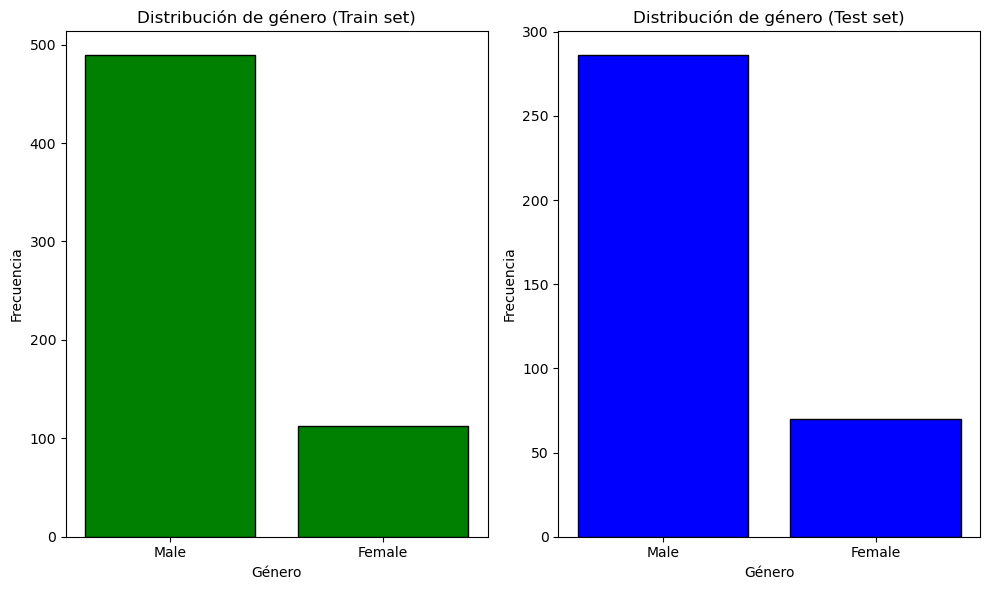

In [80]:
train_freq = train['Gender'].value_counts() 
test_freq = test['Gender'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 6))


axs[0].bar(train_freq.index, train_freq.values, color='green', edgecolor='black')
axs[0].set_title('Distribución de género (Train set)')
axs[0].set_xlabel('Género')
axs[0].set_ylabel('Frecuencia')


axs[1].bar(test_freq.index, test_freq.values, color='blue', edgecolor='black')
axs[1].set_title('Distribución de género (Test set)')
axs[1].set_xlabel('Género')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Es posible ver que en ambos conjuntos de datos la mayoría de los solicitantes son hombres, lo que indica que la mayoría de los solicitantes de préstamos son hombres.

**Estado civil del solicitante:**

In [81]:
train['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [82]:
test['Married'].value_counts()

Married
Yes    233
No     134
Name: count, dtype: int64

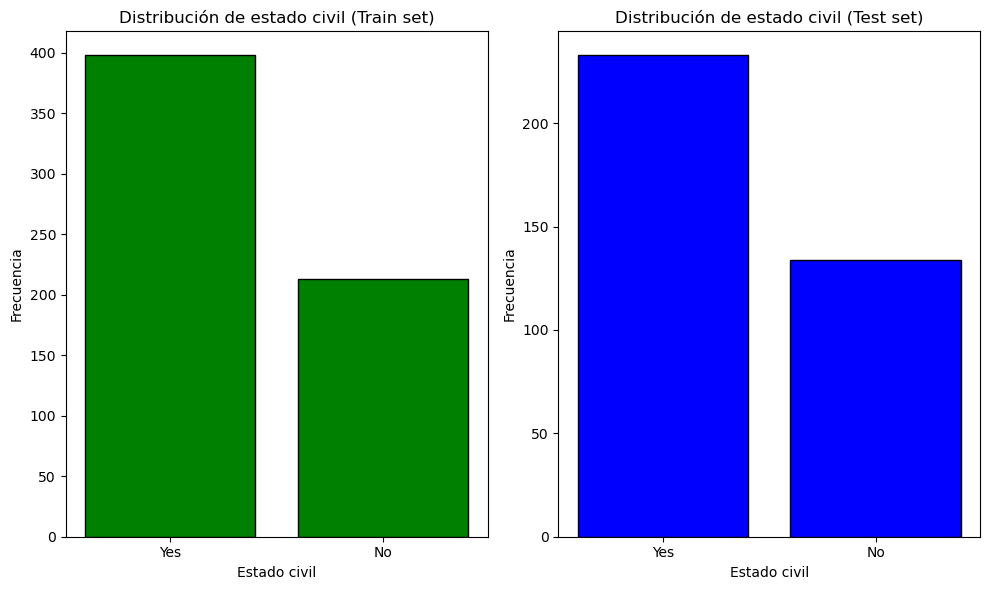

In [83]:
train_freq = train['Married'].value_counts()
test_freq = test['Married'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].bar(train_freq.index, train_freq.values, color='green', edgecolor='black')
axs[0].set_title('Distribución de estado civil (Train set)')
axs[0].set_xlabel('Estado civil')
axs[0].set_ylabel('Frecuencia')

axs[1].bar(test_freq.index, test_freq.values, color='blue', edgecolor='black')
axs[1].set_title('Distribución de estado civil (Test set)')
axs[1].set_xlabel('Estado civil')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Es posible observar que los unicos estados civiles presentes en el conjunto de datos son `Yes` y `No`, para un total de 398 y 213 respectivamente en el conjunto de datos de entrenamiento, mientras que en el conjunto de datos de prueba hay 233 y 134 respectivamente. Para un total de 631 y 347 en ambos conjuntos de datos, también es posible observar que la mayoría de los solicitantes están casados.


**¿El Solcitante trabaja como independiente?**

In [84]:
train['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [85]:
test['Self_Employed'].value_counts()

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

Visualización gráfica de la característica `Self_Employed` en el conjunto de datos:

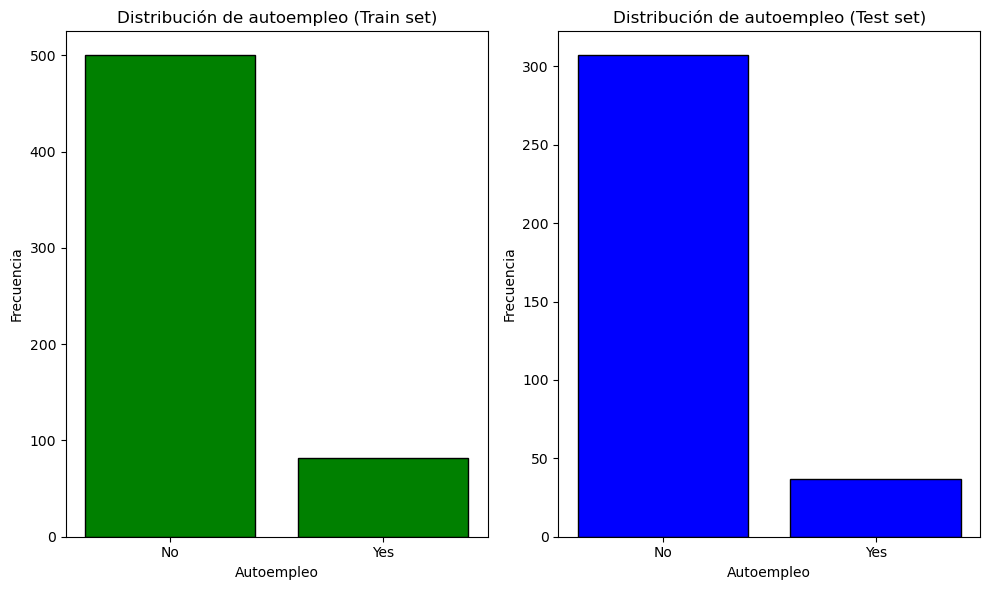

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))


train_freq = train['Self_Employed'].value_counts()
test_freq = test['Self_Employed'].value_counts()


axs[0].bar(train_freq.index, train_freq.values, color='green', edgecolor='black')
axs[0].set_title('Distribución de autoempleo (Train set)')
axs[0].set_xlabel('Autoempleo')
axs[0].set_ylabel('Frecuencia')

axs[1].bar(test_freq.index, test_freq.values, color='blue', edgecolor='black')
axs[1].set_title('Distribución de autoempleo (Test set)')
axs[1].set_xlabel('Autoempleo')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Es posible observar que la mayoría de los solicitantes no trabajan como independientes, lo que indica que la mayoría de los solicitantes son empleados. En el conjunto de entrada, hay 500 solicitantes que no trabajan como independientes y 82 que trabajan como independientes. En el conjunto de prueba, hay 307 solicitantes que no trabajan como independientes y 37 que trabajan como independientes.

**Historial crediticio del solicitante:**

In [87]:
train['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [88]:
test['Credit_History'].value_counts()

Credit_History
1.0    279
0.0     59
Name: count, dtype: int64

Visualización gráfica de la característica `Credit_History` en el conjunto de datos:

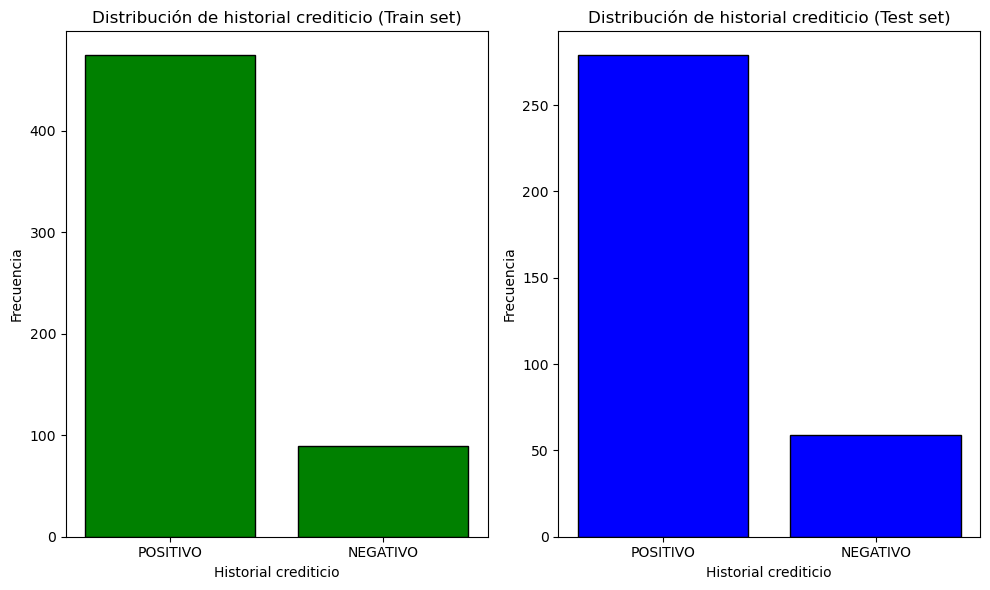

In [89]:
train_freq = train['Credit_History'].map({1: 'POSITIVO', 0: 'NEGATIVO'}).value_counts()
test_freq = test['Credit_History'].map({1: 'POSITIVO', 0: 'NEGATIVO'}).value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].bar(train_freq.index, train_freq.values, color='green', edgecolor='black')
axs[0].set_title('Distribución de historial crediticio (Train set)')
axs[0].set_xlabel('Historial crediticio')
axs[0].set_ylabel('Frecuencia')

axs[1].bar(test_freq.index, test_freq.values, color='blue', edgecolor='black')
axs[1].set_title('Distribución de historial crediticio (Test set)')
axs[1].set_xlabel('Historial crediticio')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Es posible observar que la mayoría de los solicitantes tienen un historial crediticio positivo, lo que indica que la mayoría de los solicitantes tienen un historial crediticio positivo. En el conjunto de datos de entrenamiento, hay 475 solicitantes con un historial crediticio positivo y 89 con un historial crediticio negativo. En el conjunto de datos de prueba, hay 279 solicitantes con un historial crediticio positivo y 59 con un historial crediticio negativo.



### **Distribution of Applicant income first.**

ApplicantIncome(ingreso mensual del solicitante):

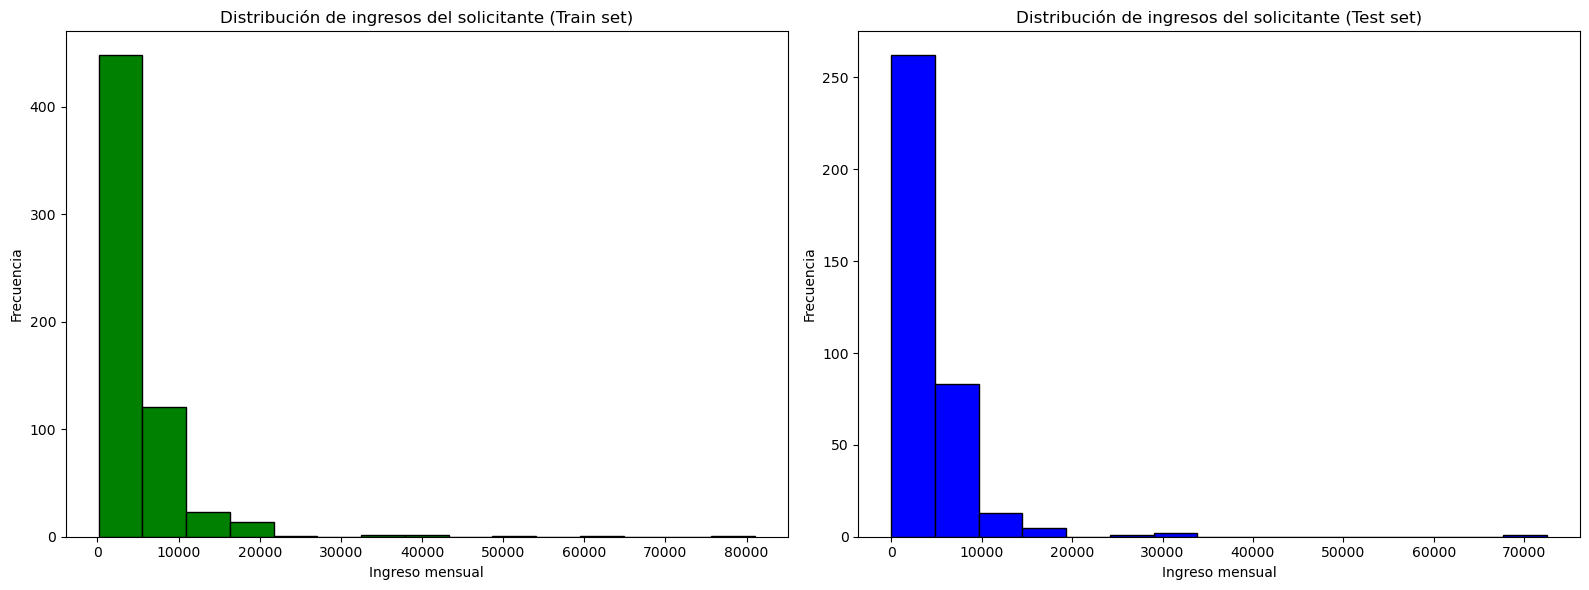

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(train['ApplicantIncome'], bins=15, color='green', edgecolor='black')
axs[0].set_title('Distribución de ingresos del solicitante (Train set)')
axs[0].set_xlabel('Ingreso mensual')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(test['ApplicantIncome'], bins=15, color='blue', edgecolor='black')
axs[1].set_title('Distribución de ingresos del solicitante (Test set)')
axs[1].set_xlabel('Ingreso mensual')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Es posible observar que la característica `ApplicantIncome` tiene una distribución sesgada a la izquierda, lo que indica que la mayoría de los solicitantes tienen ingresos bajos, pero hay algunos solicitantes con ingresos muy altos. Como anteriormente se mencionó, los datos están distribuidos de manera similar en ambos conjuntos de datos.

# **Bivariate Analysis**
Analyse the independent variable with respect to target variable. 

### **Bivariate Analysis of variables with respect to target variable**

*Género del solicitante vs Estado de aprobación del préstamo:*

In [91]:
train['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

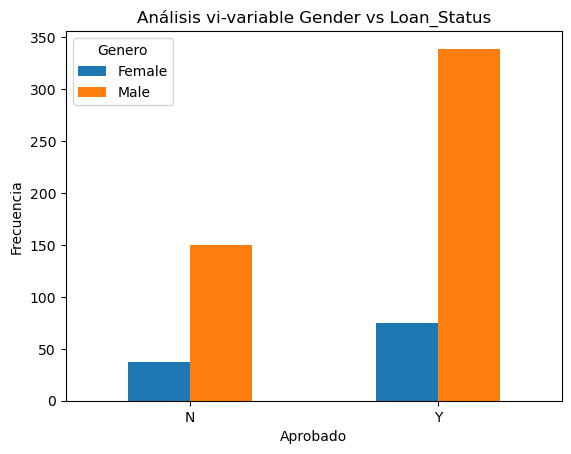

In [92]:
cross_tab = pd.crosstab(train['Loan_Status'], train['Gender'])

# Graficar el análisis vi-variable utilizando un gráfico de barras
cross_tab.plot(kind='bar')
plt.title('Análisis vi-variable Gender vs Loan_Status')
plt.xlabel('Aprobado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Genero')
plt.show()

Es posible observar que en ambos conjuntos de datos la mayoría de los solicitantes son hombres, lo que indica que la mayoría de los solicitantes de préstamos son hombres, también es importante tener en cuenta que la mayoría de los hombres tienen una mayor probabilidad de tener su solicitud de préstamo aprobada en comparación con las mujeres, por lo que el género del solicitante es una característica importante para predecir si la solicitud de préstamo será aprobada o no, pero es importante tener en cuenta que la mayoría de los solicitantes son hombres en la base de datos.

*Nivel de educación del solicitante vs Estado de aprobación del préstamo:*

In [93]:
train['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

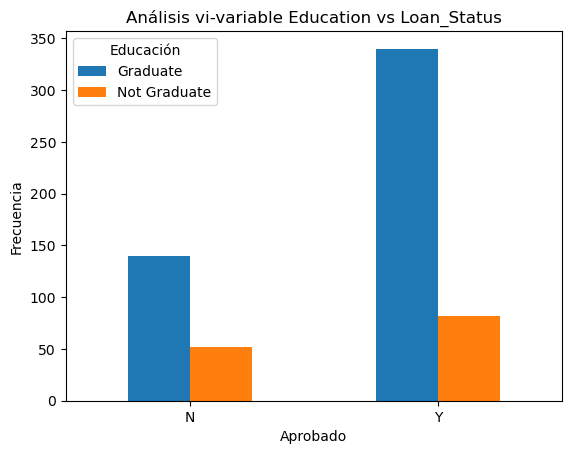

In [94]:
cross_tab = pd.crosstab(train['Loan_Status'], train['Education'])


cross_tab.plot(kind='bar')
plt.title('Análisis vi-variable Education vs Loan_Status')
plt.xlabel('Aprobado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Educación')
plt.show()

Es posible observar que en ambos conjuntos la mayoría de los solicitantes tienen un nivel de educación de graduado, lo que indica que la mayoría de los solicitantes de préstamos son graduados, también es importante tener en cuenta que los graduados tienen una mayor probabilidad de tener su solicitud de préstamo aprobada en comparación con los no graduados, por lo que el nivel de educación del solicitante es una característica importante para predecir si la solicitud de préstamo será aprobada o no.  

*Area de la propiedad vs Estado de aprobación del préstamo:*

In [95]:
train['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

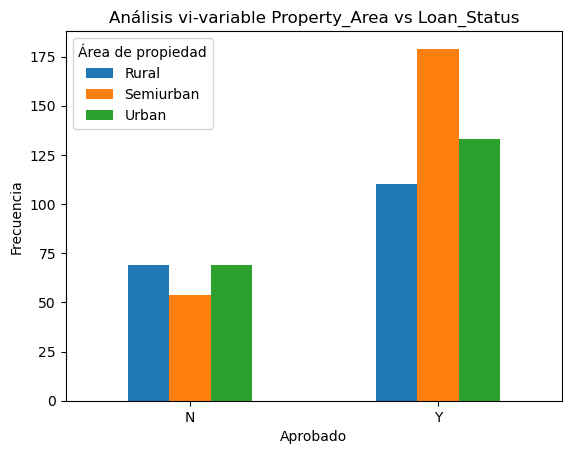

In [96]:
cross_tab = pd.crosstab(train['Loan_Status'], train['Property_Area'])

cross_tab.plot(kind='bar')
plt.title('Análisis vi-variable Property_Area vs Loan_Status')
plt.xlabel('Aprobado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Área de propiedad')
plt.show()



Es posible observar que en ambos grupos hay una distribución similar en las áreas de propiedad que solicitan las personas, es decir que no hay una diferencia significativa en la distribución de las áreas de propiedad en ambos conjuntos de datos, lo que indica que la propiedad de la zona no es una característica importante para predecir si la solicitud de préstamo será aprobada o no.

## **Most correlated variable to Loan_Status**

Para encontrar la característica más correlacionada con `Loan_Status`, se calcula la matriz de correlación y se visualiza en un mapa de calor.


In [97]:
data = train[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']]


# Reemplazar los valores faltantes con la moda
for col in data.columns:
    data[col] = data[col].fillna(data[col].mode()[0])


for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


data.head()

C:\Users\peraf\AppData\Local\Temp\ipykernel_15288\452984811.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].mode()[0])
C:\Users\peraf\AppData\Local\Temp\ipykernel_15288\452984811.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\peraf\AppData\Local\Temp\ipykernel_15288\452984811.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1


<Axes: >

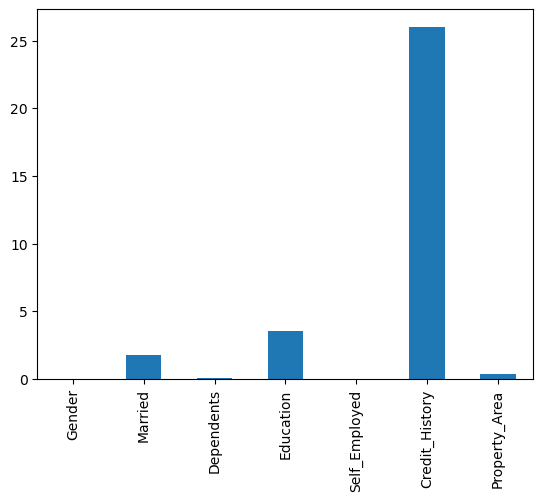

In [98]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

chi_scores = chi2(X, y)

chi_values = pd.Series(chi_scores[0], index = X.columns)
p_values = pd.Series(chi_scores[1], index = X.columns)
chi_values.plot.bar()


Es facil ver que el historial crediticio es la característica más correlacionada con `Loan_Status`, lo que indica que el historial crediticio es la característica más importante para predecir si la solicitud de préstamo será aprobada o no, la segunda característica más correlacionada con `Loan_Status` es `Education`, lo que indica que el nivel de educación del solicitante también es importante para predecir si la solicitud de préstamo será aprobada o no, es importante resaltar que entre el primer y segundo puesto hay una gran diferencia en la correlación con `Loan_Status`.

# 

# **Missing Value and Outlier Treatment**

### **Missing Value Treatment**

**Identificación de valores nulos en el conjunto de datos**

In [99]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Es posible observar que las características `Gender`, `Married`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term` y `Credit_History` tienen valores nulos en el conjunto de datos de entrenamiento, los cuales deben ser tratados antes de realizar el análisis, es importante tener en cuenta que la característica `Credit_History` es la que tiene mayor cantidad de valores nulos y debe ser tratada con cuidado,ya que es una característica importante para predecir si la solicitud de préstamo será aprobada o no.

In [100]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Es posible observar que las características `Gender`, `Married`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term` y `Credit_History` tienen valores nulos en el conjunto de datos de test, los cuales deben ser tratados antes de realizar el análisis.

**Tratamiento de valores nulos en el conjunto de datos**

*Entrenamiento:*

- Genero

In [101]:
# Reemplazar los valores de genero faltantes con la moda
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])

- Dependientes 

In [102]:
# Como el número de dependientes es una variable ordinal y no tiene una correlación muy pequeña con el target podemos optar por reemplazar los valores faltantes con la moda

train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])

- Self_Employed

In [103]:
# Reemplazar los valores de autoempleo faltantes con la moda
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

- LoanAmount

In [104]:
# Reemplazar los valores del Load Amount faltantes con la media
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())

- LoanAmountTerm

In [105]:
# LoanAmount sigue una distribución donde los periodo estan centralizados en un solo periodo de tiempo, por lo que podemos reemplazar los valores faltantes con la media
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())

- Credit_History

Para los datos de entrenamiento, se eliminan las filas con valores nulos en Credit_History, ya que es la característica más correlacionada con Loan_Status, y se imputan los valores nulos en las características

In [106]:
# Eliminar las filas con valores faltantes en la variable Credit_History
train = train.dropna(subset=['Credit_History'])


Para los valores faltantes en la variable Credit_History en los datos de test , los reemplazamos por la moda

In [107]:
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [108]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [109]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# **Model Building** 
### **Seleccion de caracteristicas**



*Label Encoding:* Realizamos la codificación de las variables categóricas a numéricas en ambos conjuntos de datos.

In [110]:
# Train set

categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status', 'Loan_ID']


for col in categorical:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])


train.head()

C:\Users\peraf\AppData\Local\Temp\ipykernel_15288\772088538.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = le.fit_transform(train[col])
C:\Users\peraf\AppData\Local\Temp\ipykernel_15288\772088538.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = le.fit_transform(train[col])
C:\Users\peraf\AppData\Local\Temp\ipykernel_15288\772088538.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


In [111]:
# Test set

categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_ID']

for col in categorical:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])

test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1,2


*Correlación de características:* 

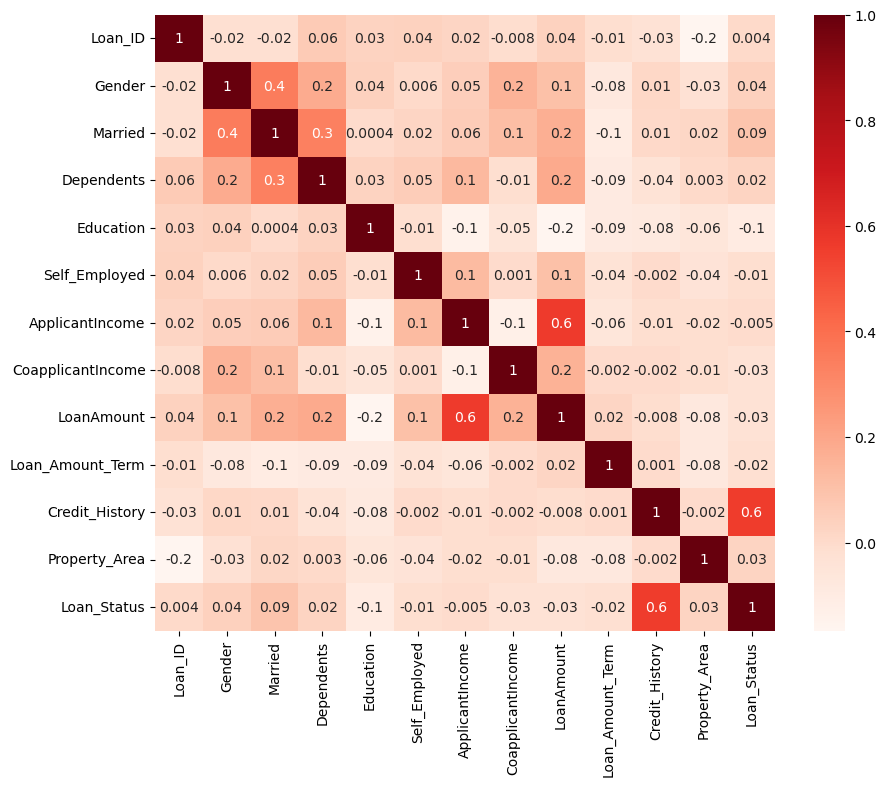

In [112]:
# Entrenamiento
corr_matrix = train.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt=".1g")
plt.show()

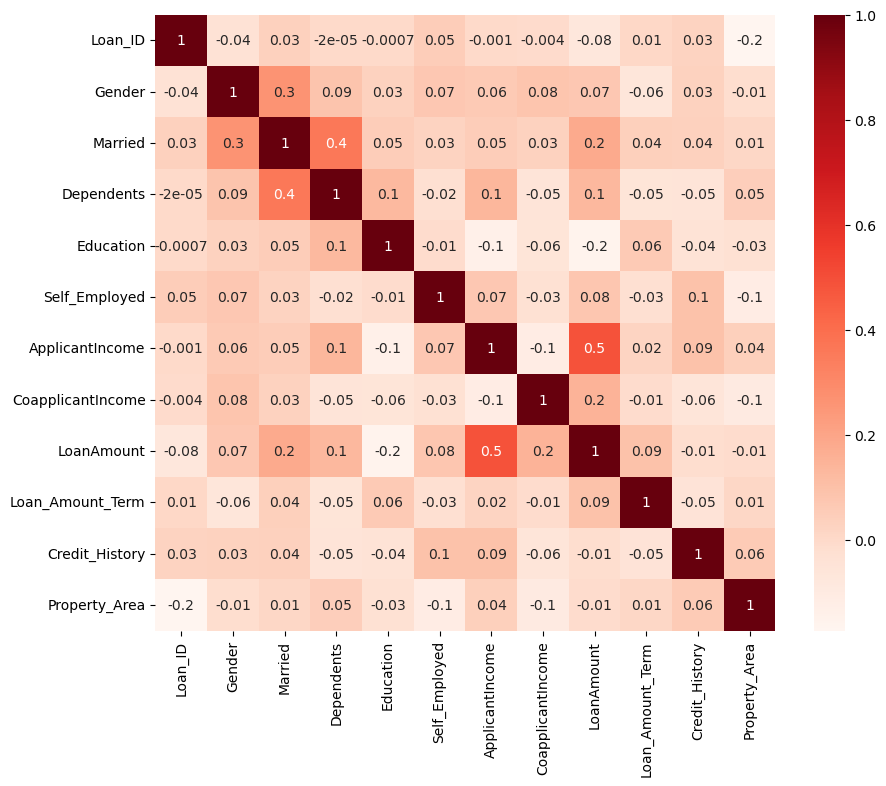

In [113]:
# Test
corr_matrix = test.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt=".1g")
plt.show()

In [114]:
# Train set
from sklearn.model_selection import train_test_split


X = train.drop(['Loan_ID', 'Loan_Status'], axis=1).values
y = train['Loan_Status']

# Dividir el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Test set
X_file = test.drop(['Loan_ID'], axis=1).values

In [116]:
# Import your necessary dependencies



#### 1) Decision Tree Classifier

Implementación del clasificador de árbol de decisión con los datos de entrenamiento. Para seleccionar las características vamos a usar la técnica Recursive Feature Elimination y un esquema de validación cruzada con 10 divisiones y 3 repeticiones para evaluar el rendimiento del modelo, además que nos apoyamos de los Pipeline para realizar el preprocesamiento de los datos y la selección de características.


In [117]:
# Modelo
from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier(random_state=1,criterion='entropy')


In [118]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)
Dtree = DecisionTreeClassifier(random_state=1,criterion='entropy')
pipeline = Pipeline(steps=[('s',rfe),('m',Dtree)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

pipeline.fit(X_train, y_train)
# report performance


Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=7)),
                ('m',
                 DecisionTreeClassifier(criterion='entropy', random_state=1))])

*Métricas de evaluación:*

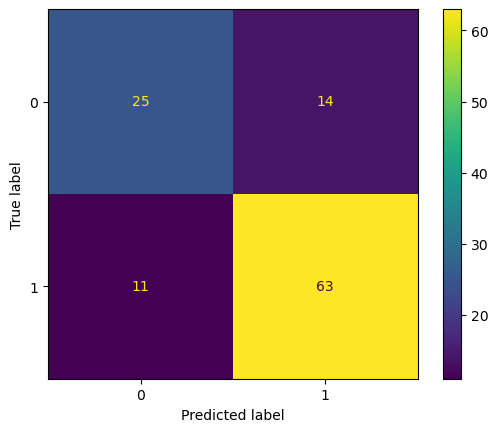

In [119]:
y_pred = pipeline.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [120]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average=None)}')
print(f'Recall: {recall_score(y_test, y_pred, average=None)}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')

Accuracy: 0.7787610619469026
Precision: [0.69444444 0.81818182]
Recall: [0.64102564 0.85135135]
F1: [0.66666667 0.83443709]


Podemos ver que el modelo de árbol de decisión tiene una exactitud del 0.75 en los datos de test, lo que indica que el modelo es capaz de predecir si la solicitud de préstamo será aprobada o no con una exactitud del 75%.

In [121]:
# Save the prediction in a csv
predictions = pipeline.predict(X_file)
predictions = pd.Series(predictions).map({1: 'Y', 0: 'N'})
output = pd.DataFrame({'Loan_ID': test_original_id, 'Loan_Status': predictions})
output.to_csv('output/dtree_loan_prediction.csv', index=False)

#### 2) Random Forest Classifier

Los datos ya están codificados y listos para ser utilizados en el modelo de Random Forest Classifier.

In [122]:
from sklearn.ensemble import RandomForestClassifier


rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=8)
rf=RandomForestClassifier(n_estimators=50,random_state=1)
pipeline = Pipeline(steps=[('s',rfe),('m',rf)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

pipeline.fit(X_train, y_train)

#rf.fit(X_train, y_train)


Pipeline(steps=[('s',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=8)),
                ('m', RandomForestClassifier(n_estimators=50, random_state=1))])

*Métricas de evaluación:*

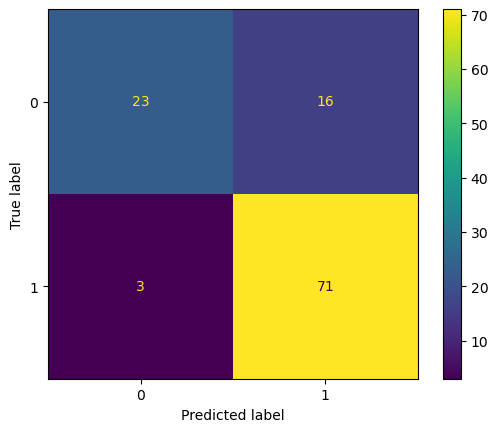

In [123]:
y_pred = pipeline.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [124]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average=None)}')
print(f'Recall: {recall_score(y_test, y_pred, average=None)}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')

Accuracy: 0.831858407079646
Precision: [0.88461538 0.81609195]
Recall: [0.58974359 0.95945946]
F1: [0.70769231 0.88198758]


In [125]:
# Save the prediction in a csv
predictions = pipeline.predict(X_file)
predictions = pd.Series(predictions).map({1: 'Y', 0: 'N'})
output = pd.DataFrame({'Loan_ID': test_original_id, 'Loan_Status': predictions})
output.to_csv('output/rforest_loan_prediction.csv', index=False)

#### 3) K-Nearest-Neighbors

Implementación del clasificador K-Nearest-Neighbors en los datos de entrenamiento y predicción en los datos de pruebas.

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20,metric="minkowski",p=2)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

*Métricas de evaluación:*

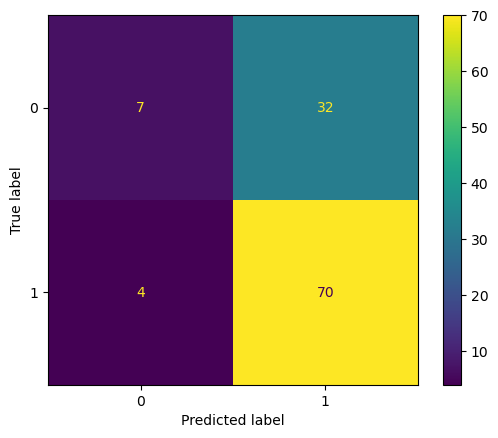

In [127]:
y_pred = knn.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [128]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average=None)}')
print(f'Recall: {recall_score(y_test, y_pred, average=None)}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')

Accuracy: 0.6814159292035398
Precision: [0.63636364 0.68627451]
Recall: [0.17948718 0.94594595]
F1: [0.28       0.79545455]


In [129]:
predictions = knn.predict(X_file)
predictions = pd.Series(predictions).map({1: 'Y', 0: 'N'})
output = pd.DataFrame({'Loan_ID': test_original_id, 'Loan_Status': predictions})
output.to_csv('output/knn_loan_prediction.csv', index=False)

#### 4) Support Vector Classifier

Feature Scaling: Realizamos el escalado de características en ambos conjuntos de datos.

In [130]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)

In [131]:
x_test=scaler.fit_transform(X_test)

In [132]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",random_state=0)

In [133]:
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

*Métricas de evaluación:*

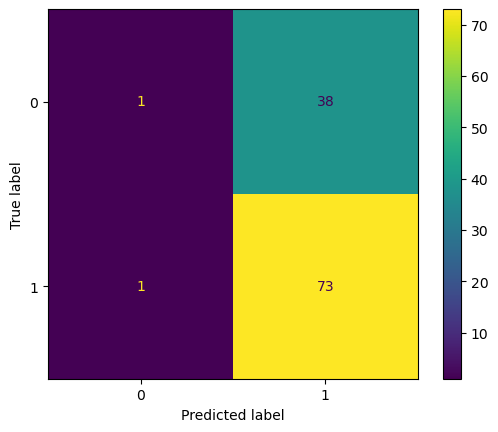

In [134]:
y_pred = svc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [135]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average=None)}')
print(f'Recall: {recall_score(y_test, y_pred, average=None)}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')

Accuracy: 0.6548672566371682
Precision: [0.5        0.65765766]
Recall: [0.02564103 0.98648649]
F1: [0.04878049 0.78918919]


In [136]:
predictions = svc.predict(X_file)
predictions = pd.Series(predictions).map({1: 'Y', 0: 'N'})
output = pd.DataFrame({'Loan_ID': test_original_id, 'Loan_Status': predictions})
output.to_csv('output/xgboost_loan_prediction.csv', index=False)

#### 4) XGBoost

La estrategia implementada consiste en buscar los mejores hiperparámetros para un modelo XGBoost a través de Grid Search Cross-Validation (GridSearchCV). Se define un espacio de búsqueda que especifica diferentes valores para los hiperparámetros clave del modelo, como la profundidad máxima del árbol, la tasa de aprendizaje y el número de árboles a construir. Luego, se utiliza validación cruzada estratificada para evaluar el rendimiento del modelo con diferentes combinaciones de hiperparámetros. GridSearchCV busca exhaustivamente en este espacio de búsqueda y selecciona los hiperparámetros que producen el mejor rendimiento según una métrica de evaluación específica, en este caso, la precisión. Una vez finalizada la búsqueda, se muestran los resultados, incluido el mejor resultado de la validación cruzada y los mejores hiperparámetros encontrados. Esta estrategia permite ajustar los hiperparámetros del modelo de manera sistemática y automatizada, optimizando así su rendimiento para el conjunto de datos proporcionado.

In [137]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [138]:
param_grid = {
    'max_depth': [3, 4, 5], # Profundidad máxima del árbol
    'learning_rate': [0.1, 0.01, 0.05], # Tasa de aprendizaje
    'n_estimators': [50, 100, 200], # Número de árboles a construir
}

# Inicializar el clasificador XGBoost
xgb_model = xgb.XGBClassifier()

# Inicializar la validación cruzada
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda de hiperparámetros usando GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# Mostrar los resultados
print("Mejor resultado de la validación cruzada:", grid_result.best_score_)
print("Mejores hiperparámetros encontrados:", grid_result.best_params_)


Mejor resultado de la validación cruzada: 0.8158974358974358
Mejores hiperparámetros encontrados: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}


In [139]:
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


# Modelo con los mejores hiperparámetros

xg = xgb.XGBClassifier(**best_params)

# Entrenar el modelo con los datos completos
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

*Métricas de evaluación:*

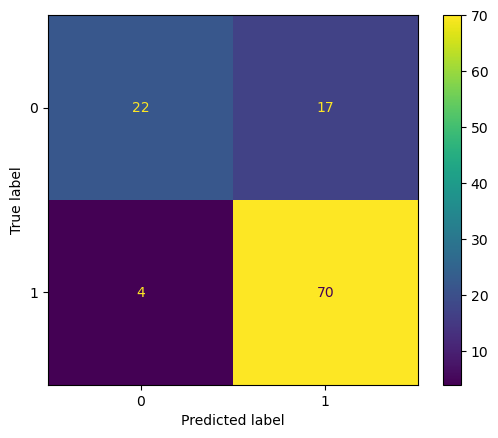

In [140]:
y_pred = xg.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [141]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average=None)}')
print(f'Recall: {recall_score(y_test, y_pred, average=None)}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')

Accuracy: 0.8141592920353983
Precision: [0.84615385 0.8045977 ]
Recall: [0.56410256 0.94594595]
F1: [0.67692308 0.86956522]


In [142]:
predictions = xg.predict(X_file)
predictions = pd.Series(predictions).map({1: 'Y', 0: 'N'})
output = pd.DataFrame({'Loan_ID': test_original_id, 'Loan_Status': predictions})
output.to_csv('output/xgboost_loan_prediction.csv', index=False)

## **Mejor Modelo**

Dado que se esta evaluando la predicción de la aprobación de un crédito, el rendimiento del modelo es de vital importancia, especialmente en términos de preicisión, ya que queremos minimizar lso faltos positivos (personas que se les otorga un crédito pero no son aptas para recibirlo). De acuerdo a las métricas de evaluación, Random Forest y XGBoost tienen la mayor precisión para la clase positiva (aprobación del crédito), con valores de precisión de alrededor del 80%. Sin embargo, el modelo Random Forest tiene un mejor equilibrio entre precisión y recall para la clase positiva en comparación con XGBoost. Por lo tanto, si priorizamos reducir los falsos positivos mientras mantenemos una alta tasa de verdaderos positivos, el modelo de Random Forest sería la mejor opción en este caso.